In [ ]:
# https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [ ]:
df = pd.read_csv('world_population.csv')

In [ ]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


<ipython-input-51-99ba402e3b20>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  continent_population = df.groupby('Continent').sum()[['2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population']]


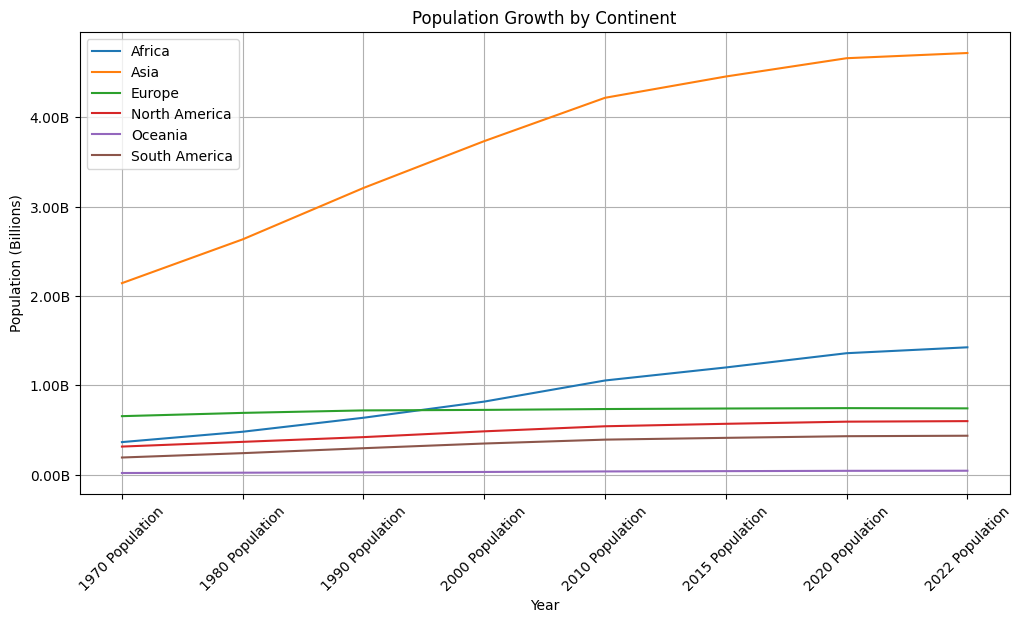

In [ ]:

continent_population = df.groupby('Continent').sum()[['2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population']]
continent_population = continent_population.T

plt.figure(figsize=(12, 6))

for continent in continent_population.columns:
    plt.plot(continent_population.index, continent_population[continent], label=continent)

plt.xlabel('Year')
plt.ylabel('Population (Billions)')
plt.title('Population Growth by Continent')
plt.legend()
plt.grid(True)

# Reverse the x-axis
plt.gca().invert_xaxis()

# Display only years on the x-axis
plt.xticks(continent_population.index, rotation=45)

# Format the y-axis to display population in billions
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{x / 1e9:.2f}B'))

plt.show()

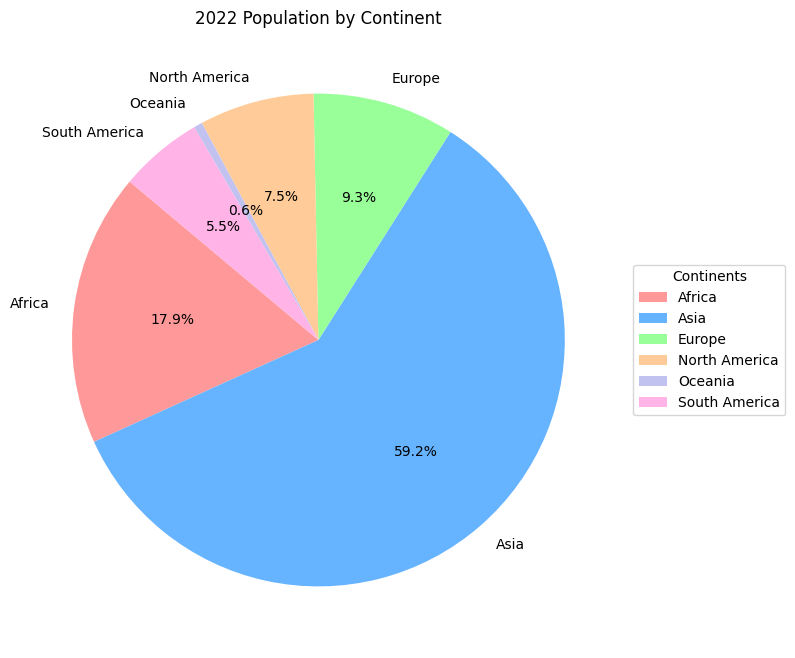

In [ ]:
# Group the data by continent and sum the 2022 population
continent_population_2022 = df.groupby('Continent')['2022 Population'].sum()

# Define custom colors for each continent
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(continent_population_2022, labels=continent_population_2022.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('2022 Population by Continent')

# Add a legend
plt.legend(continent_population_2022.index, title="Continents", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

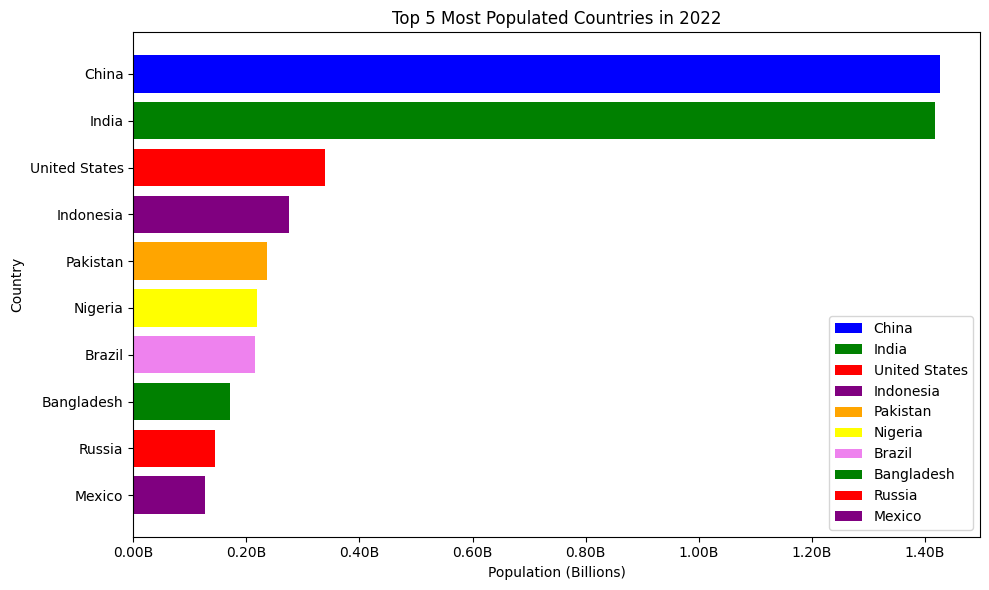

In [ ]:
# Sort the data by 2022 Population and get the top 5 countries
top_5_countries = df.sort_values(by='2022 Population', ascending=False).head(10)

plt.figure(figsize=(10, 6))

# Assign different colors to each country
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'violet', 'green', 'red', 'purple',]

# Create horizontal bar plots for the top 5 countries in descending order
for i, (country, population) in enumerate(zip(top_5_countries['Country/Territory'], top_5_countries['2022 Population'])):
    plt.barh(country, population, color=colors[i], label=country)

plt.xlabel('Population (Billions)')
plt.ylabel('Country')
plt.title('Top 5 Most Populated Countries in 2022')
plt.legend()

# Format the x-axis to display population in billions
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{x / 1e9:.2f}B'))

plt.tight_layout()
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest population at the top
plt.show()

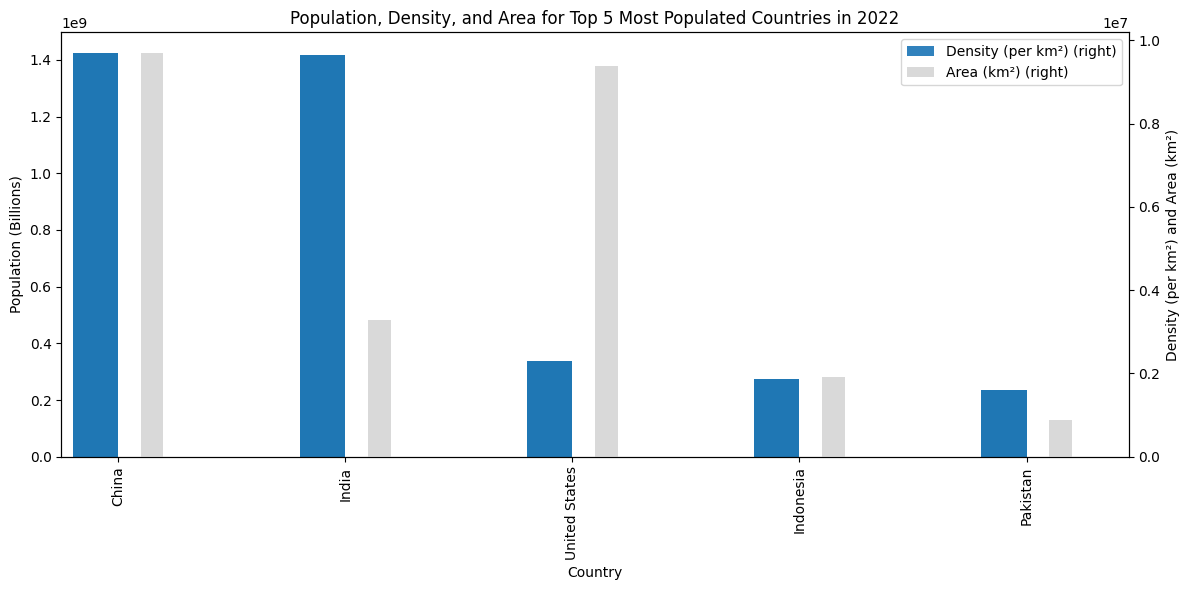

In [ ]:

# Sort the data by 2022 Population and get the top 5 countries
top_5_countries = df.sort_values(by='2022 Population', ascending=False).head(5)

# Select the columns of interest
columns_of_interest = ['Country/Territory', '2022 Population', 'Density (per km²)', 'Area (km²)']
top_5_data = top_5_countries[columns_of_interest]

# Set the country column as the index for easy plotting
top_5_data = top_5_data.set_index('Country/Territory')

plt.figure(figsize=(12, 6))

# Create a primary y-axis for population
ax1 = top_5_data['2022 Population'].plot(kind='bar', width=0.2, position=1, color='tab:blue', label='Population (Billions)')

# Create a secondary y-axis for density and area
ax2 = top_5_data[['Density (per km²)', 'Area (km²)']].plot(kind='bar', width=0.2, position=0, ax=ax1, colormap='tab20c', secondary_y=True)

ax1.set_xlabel('Country')
ax1.set_ylabel('Population (Billions)')
ax2.set_ylabel('Density (per km²) and Area (km²)')

plt.title('Population, Density, and Area for Top 5 Most Populated Countries in 2022')

plt.tight_layout()
plt.show()
